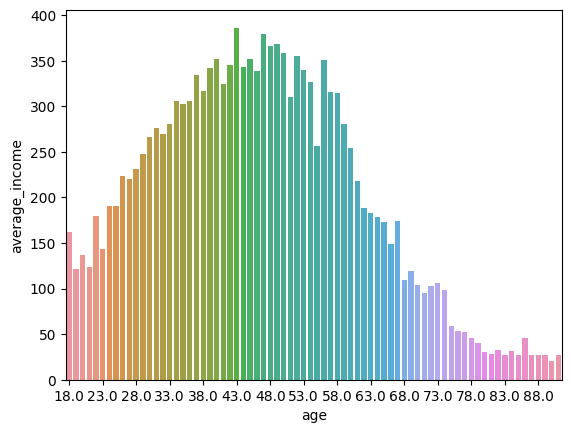

     age  average_income
25  43.0      386.195876


In [1]:
# 작성자: 송우석
# 2. 몇 살 때 월급을 가장 많이 받을까?

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams['font.family'] = 'D2Coding'

raw_welfare = pd.read_spss('../Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()
welfare = welfare.rename(columns = {'h14_g3':'sex',
                                    'h14_g4':'birth',
                                    'h14_g10':'marriage_type',
                                    'h14_g11':'religion',
                                    'p1402_8aq1':'income',
                                    'h14_eco9':'code_job',
                                    'h14_reg7':'code_region'})

# birth열로 나이 계산해 age열 생성
welfare['age'] = 2019-welfare['birth']
age_income = welfare.dropna(subset = ['income'])\
    .groupby('age', as_index = False)\
        .agg(average_income = ('income', 'mean'))

#그래프 출력(x축 눈금이 너무 촘촘해서 5세 단위로 나타냄)
total_len = len(age_income.index)
sns.barplot(data = age_income, x = 'age', y = 'average_income')\
    .set_xticks(np.arange(0, total_len + 1, 5))
plt.show()

#43세가 평균 월급을 가장 많이 받는다.
highest_average_income = age_income[age_income['average_income'] == age_income['average_income'].max()]
print(highest_average_income)